# HZZ4l mini analysis

First a few useful Jupyter shortcuts:

* Enter: edit a cell
* Esc: escape from edit mode
* b: Add a cell below
* a: Add a cell above
* m: switch to Markdown cell
* Ctrl-Enter: Run cell
* Alt-Enter: Run cell and add cell below
* Shift-Enter: Run cell and move below

In [1]:
import ROOT

Welcome to ROOTaaS 6.06/00


These are signal and background simulated data we are interested in

In [2]:
# Signal tree
! ls /data_CMS/cms/ochando/CJLSTReducedTree/160726/ZZTo4l
# Background tree
! ls /data_CMS/cms/ochando/CJLSTReducedTree/160726/ggH125

ZZ4lAnalysis.root
ZZ4lAnalysis.root


Let's look at what is inside the files

In [3]:
signal_file = ROOT.TFile.Open('/data_CMS/cms/ochando/CJLSTReducedTree/160726/ggH125/ZZ4lAnalysis.root')
signal_file.cd('ZZTree')
signal_file.ls()

TFile**		/data_CMS/cms/ochando/CJLSTReducedTree/160726/ggH125/ZZ4lAnalysis.root	
 TFile*		/data_CMS/cms/ochando/CJLSTReducedTree/160726/ggH125/ZZ4lAnalysis.root	
  TDirectoryFile*		ZZTree	ZZTree
   KEY: TTree	candTree;1	Event Summary
   KEY: TH1F	Counters;1	Counters
   KEY: TH2F	Counters_reweighted;1	Counters_reweighted
   KEY: TTree	couplings;1	reweighting couplings
  KEY: TDirectoryFile	ZZTree;1	ZZTree
  KEY: TDirectoryFile	PlotsZZ;1	PlotsZZ


We retrieve the signal ROOT tree where the events are stored. 

In [4]:
signal_tree = signal_file.Get('ZZTree/candTree')

We load the first event and look at the variables values. Type Esc-o to toggle the output cell.

In [5]:
signal_tree.GetEntry(0)
signal_tree.Show()

======> EVENT:0
 RunNumber       = 1
 EventNumber     = 254049
 LumiNumber      = 1278
 NRecoMu         = 2
 NRecoEle        = 2
 Nvtx            = 12
 NObsInt         = 15
 NTrueInt        = 20.1439
 PFMET           = 23.4662
 PFMETPhi        = -2.08841
 PFMETNoHF       = 43.1148
 PFMETNoHFPhi    = -1.85145
 nCleanedJets    = 2
 nCleanedJetsPt30 = 1
 nCleanedJetsPt30_jecUp = 1
 nCleanedJetsPt30_jecDn = 1
 nCleanedJetsPt30BTagged = 0
 nCleanedJetsPt30BTagged_bTagSF = 0
 nCleanedJetsPt30BTagged_bTagSFUp = 0
 nCleanedJetsPt30BTagged_bTagSFDn = 0
 trigWord        = -32565
 ZZMass          = 119.048
 ZZMassErr       = 1.17973
 ZZMassErrCorr   = 1.17973
 ZZMassPreFSR    = 119.048
 ZZsel           = 100
 ZZPt            = 105.919
 ZZEta           = 0.323407
 ZZPhi           = -2.33697
 CRflag          = 805306368
 Z1Mass          = 83.7659
 Z1Pt            = 71.7932
 Z1Flav          = -169
 ZZMassRefit     = 119.327
 ZZMassRefitErr  = 1.44506
 ZZMassUnrefitErr = 1.46347
 Z2Mass          = 26

We choose to read only a subset of the variables, that we are going to use

In [6]:
signal_tree.SetBranchStatus('*', 0)
signal_tree.SetBranchStatus('GenLep*',1)
signal_tree.SetBranchStatus('GenZ*',1)
signal_tree.SetBranchStatus('GenH*',1)
signal_tree.SetBranchStatus('Lep*',1)
signal_tree.SetBranchStatus('Z*',1)

In [7]:
signal_tree.Show()

======> EVENT:0
 ZZMass          = 119.048
 ZZMassErr       = 1.17973
 ZZMassErrCorr   = 1.17973
 ZZMassPreFSR    = 119.048
 ZZsel           = 100
 ZZPt            = 105.919
 ZZEta           = 0.323407
 ZZPhi           = -2.33697
 Z1Mass          = 83.7659
 Z1Pt            = 71.7932
 Z1Flav          = -169
 ZZMassRefit     = 119.327
 ZZMassRefitErr  = 1.44506
 ZZMassUnrefitErr = 1.46347
 Z2Mass          = 26.9499
 Z2Pt            = 34.1295
 Z2Flav          = -121
 LepPt           = (vector<float>*)0x5814420
 LepEta          = (vector<float>*)0x578cdb0
 LepPhi          = (vector<float>*)0x5792450
 LepLepId        = (vector<short>*)0x57821f0
 LepSIP          = (vector<float>*)0x572c9d0
 LepTime         = (vector<float>*)0x579bdf0
 LepisID         = (vector<bool>*)0x5afe4c0
 LepisLoose      = (vector<short>*)0x575fd00
 LepBDT          = (vector<float>*)0x5814e90
 LepMissingHit   = (vector<char>*)0x5b40e20
 LepCombRelIsoPF = (vector<float>*)0x5b3f800
 ZXFakeweight    = 1
 GenHMass        =

## Generated objects

First we look at generated objects. Below we fill an histogram with the transverse momentum (pT) of the first lepton.

In [8]:
histo_pt = ROOT.TH1F('histo_pt', 'histo_pt', 50, 0, 100)
signal_tree.Project('histo_pt', 'GenLep1Pt')

127817L

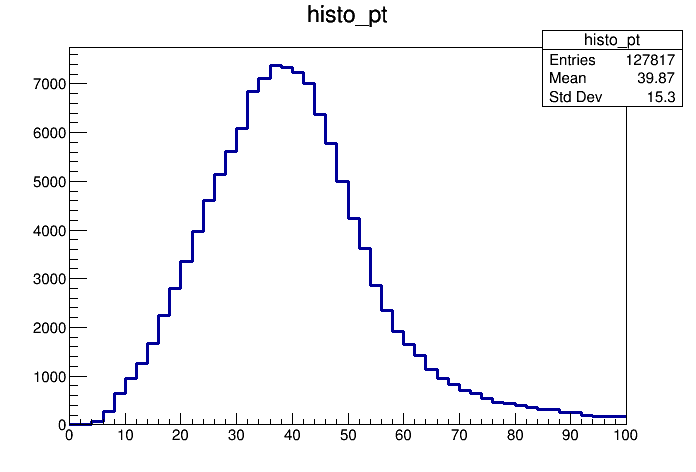

In [9]:
canvas = ROOT.TCanvas()
histo_pt.Draw()
canvas.Draw()

* Look at the ID and kinematic variables of the four leptons, for signal and background
* Compute the two Z 4-vectors and compare them to the variables stored in the tree
* Compute the ZZ (aka H) 4-vector and compare it to the variables stored in the tree

## Reconstructed objects

* Compare generation-level with reconstruction-level lepton variables
* Compare the H mass at generation- and reconstruction-levels

## Comparison between data and simulation

* Apply the correct normalization to the simulation distributions
* Stack the background and signal distributions
* Compare real data and simulation

## Measure the Higgs mass

* Measure the reconstructed masses for different generated masses
* Measure the mass in data